# Data Preprocessing and Analysis

This notebook focuses on loading, visualizing, preprocessing, and preparing the UCI Adult dataset for further analysis or machine learning modeling.


In [10]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split


## Loading the Dataset


In [11]:
# Load the dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data"
columns = ['age', 'workclass', 'fnlwgt', 'education', 'education_num', 'marital_status', 'occupation', 'relationship', 'race', 'sex', 'capital_gain', 'capital_loss', 'hours_per_week', 'native_country', 'income']
data = pd.read_csv(url, names=columns, na_values=' ?', skipinitialspace=True)


## Initial Data Overview


In [12]:
# Display the first few rows of the dataset and check for missing values
print("Data Overview:")
print(data.head())
print("\nMissing Values:")
print(data.isna().sum())


Data Overview:
   age         workclass  fnlwgt  education  education_num  \
0   39         State-gov   77516  Bachelors             13   
1   50  Self-emp-not-inc   83311  Bachelors             13   
2   38           Private  215646    HS-grad              9   
3   53           Private  234721       11th              7   
4   28           Private  338409  Bachelors             13   

       marital_status         occupation   relationship   race     sex  \
0       Never-married       Adm-clerical  Not-in-family  White    Male   
1  Married-civ-spouse    Exec-managerial        Husband  White    Male   
2            Divorced  Handlers-cleaners  Not-in-family  White    Male   
3  Married-civ-spouse  Handlers-cleaners        Husband  Black    Male   
4  Married-civ-spouse     Prof-specialty           Wife  Black  Female   

   capital_gain  capital_loss  hours_per_week native_country income  
0          2174             0              40  United-States  <=50K  
1             0            

## Data Visualization


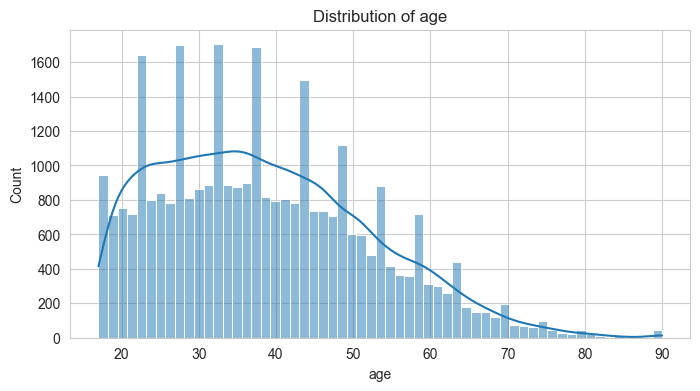

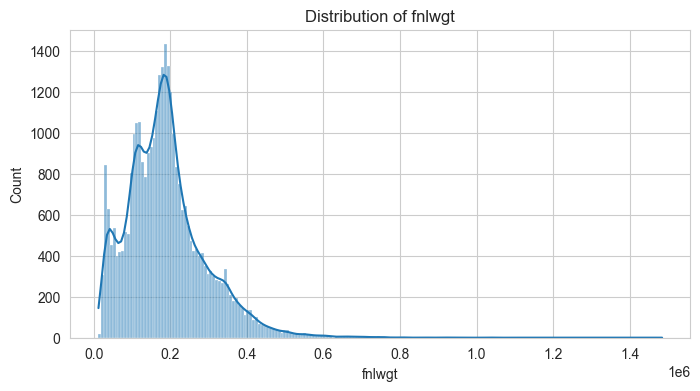

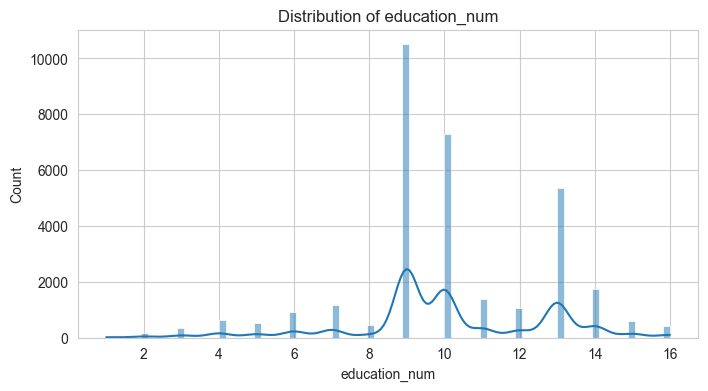

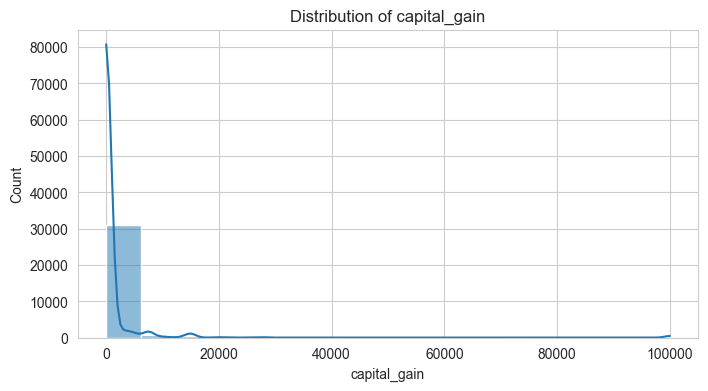

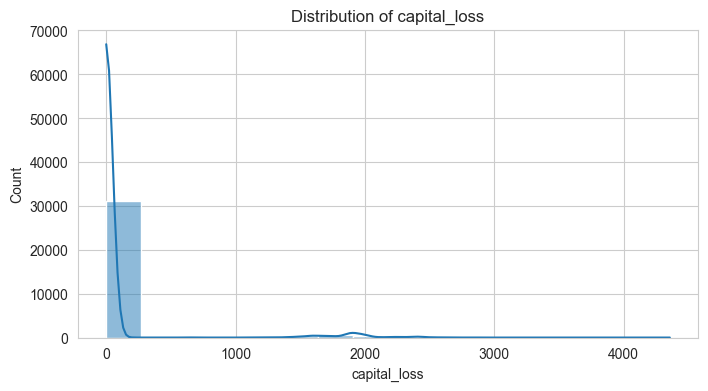

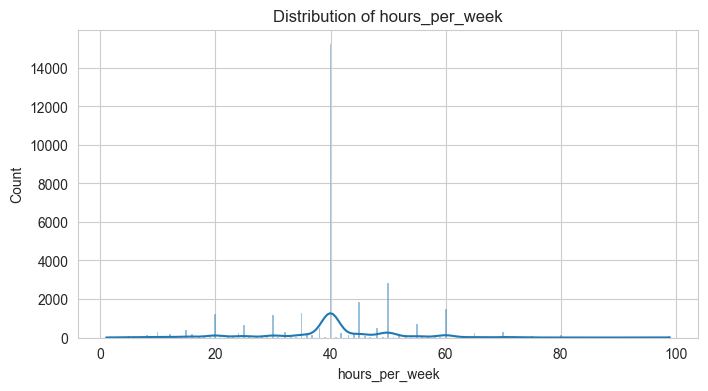

In [13]:
# Visualize data distribution for numerical features
numerical_features = data.select_dtypes(include=['int64', 'float64']).columns

for feature in numerical_features:
    plt.figure(figsize=(8, 4))
    sns.histplot(data[feature], kde=True)
    plt.title(f'Distribution of {feature}')
    plt.show()


## Data Cleaning and Normalization


In [14]:
# Handle missing values
data.dropna(inplace=True)

# Normalize numerical features
scaler = MinMaxScaler()
data[numerical_features] = scaler.fit_transform(data[numerical_features])


## Visualization Post-Normalization


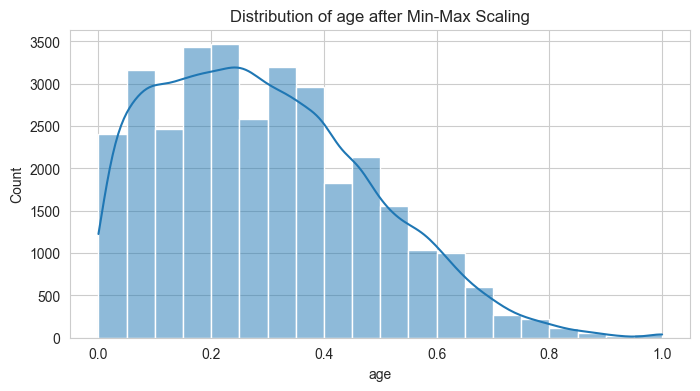

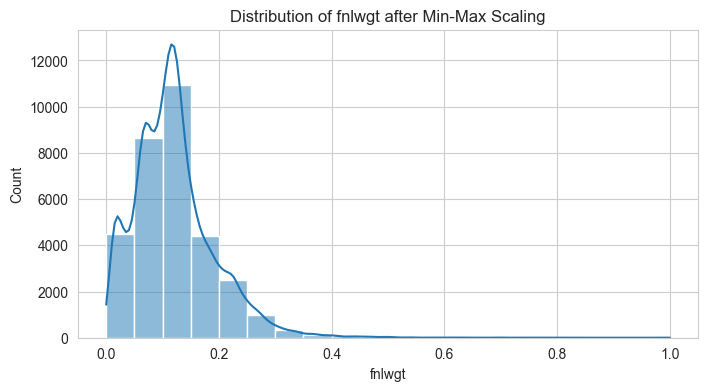

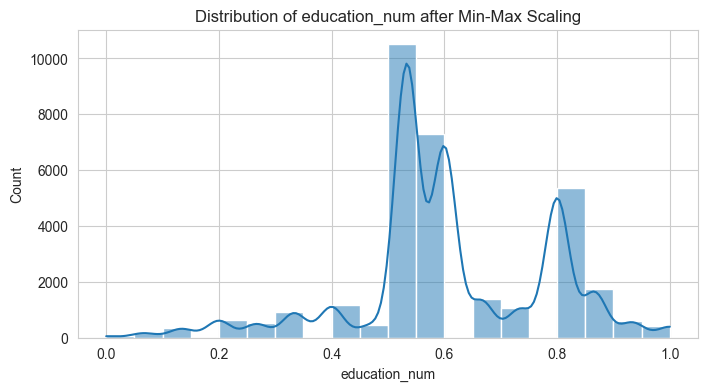

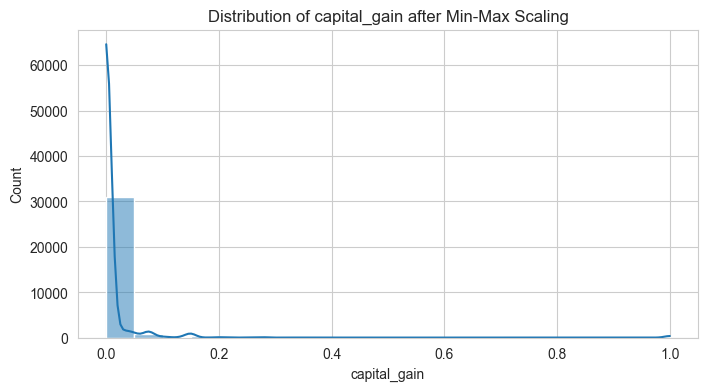

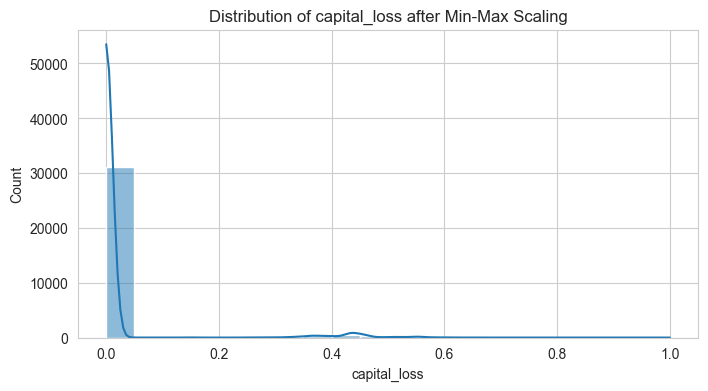

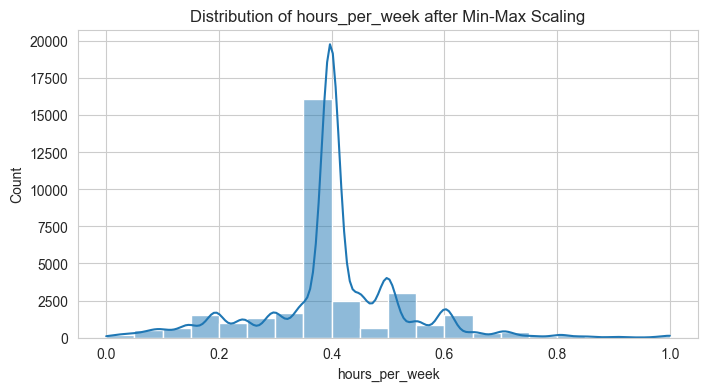

In [15]:
# Visualize the effect of normalization
for feature in numerical_features:
    plt.figure(figsize=(8, 4))
    sns.histplot(data[feature], kde=True, bins=20)
    plt.title(f'Distribution of {feature} after Min-Max Scaling')
    plt.show()


## Encoding Categorical Features


In [16]:
# Encode categorical features excluding 'income'
categorical_features = data.select_dtypes(include=['object']).columns.difference(['income'])
encoder = OneHotEncoder(sparse=False, drop='first')
encoded_data = pd.DataFrame(encoder.fit_transform(data[categorical_features]))
encoded_data.columns = encoder.get_feature_names_out(categorical_features)


C:\Users\Rxque\PycharmProjects\tensorflow_training\venv\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


## Preparing the Final Dataset for Modeling


In [17]:
# Combine encoded categorical features with the rest of the dataset
data_encoded = data.drop(categorical_features, axis=1)
data_encoded = pd.concat([data_encoded, encoded_data], axis=1)

# Split the dataset into training and testing sets
X = data_encoded.drop('income', axis=1)
y = data_encoded['income']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the final dataset
"\nFinal Dataset:"
X_train.head()


,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week,education_11th,education_12th,education_1st-4th,education_5th-6th,...,relationship_Wife,sex_Male,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,workclass_Without-pay
5514,0.219178,0.126253,0.800000,0.0,0.000000,0.500000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
19777,0.260274,0.050376,0.666667,0.0,0.433196,0.500000,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
10781,0.561644,0.129551,0.266667,0.0,0.000000,0.397959,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
32240,0.054795,0.114033,0.666667,0.0,0.000000,0.459184,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
9876,0.136986,0.181733,0.600000,0.0,0.000000,0.397959,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


## Conclusion

The dataset has been successfully preprocessed, normalized, and prepared for further analysis or machine learning modeling.
